# Phase VII — Model Validation

This notebook evaluates the performance and generalization ability of the
linear regression models using statistical metrics such as R² and RMSE.


## Phase VII.1 — R^2 Evaluation

R^2 measures the proportion of variance in the target variable explained by
the model. Comparing train and test R^2 values provides insight into the
generalization performance of the model.

In [18]:
# libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [20]:
from scripts.linear_regression import LinearRegressionMaster
from scripts.data_preprocessing import *
from scripts.model_utils import *

In [21]:
train_df = pd.read_csv("../data/train.csv")
test_ddf = pd.read_csv("../data/test.csv")

In [22]:
y = log_transform(train_df)

In [23]:
X_df = train_df.drop(columns = "SalePrice")

In [24]:
X_df = nan_check(X_df)
X_df = none_check_cat(X_df)

categorical = categorical_cols(X_df)
X_df = onehot_encode_categorical(X_df,categorical)

In [25]:
# train test split
X_train , X_test , y_train , y_test = train_test_split_np(X_df.values,y)

In [26]:
X_train.shape , X_test.shape

((1168, 304), (292, 304))

In [27]:
type(X_train), X_train.dtype

(numpy.ndarray, dtype('O'))

In [28]:
X_train = X_train.astype(np.float64)
X_test  = X_test.astype(np.float64)

In [29]:
X_train_scaled, X_test_scaled, mu, sigma = standardize_train_test(X_train, X_test)

In [30]:
# sanity check 
X_train_scaled.mean(axis=0)[:5]

array([-5.72221114e-17, -3.17478159e-17,  1.54550792e-16, -1.79413181e-17,
       -1.56647906e-16])

In [29]:
X_train_scaled.std(axis=0)[:5]

array([1., 1., 1., 1., 1.])

In [31]:
# adding bias column
X_train_bias, X_test_bias = bias_term(X_train_scaled, X_test_scaled)

In [32]:
model = LinearRegressionMaster()

In [33]:
model.fit_gradient_descent(
    X_train_bias,
    y_train,
    alpha=0.01,
    epochs=1000
)

In [34]:
y_train_pred = model.predict(X_train_bias)
y_test_pred  = model.predict(X_test_bias)

In [35]:
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

r2_train, r2_test

(np.float64(0.9505083501561791), np.float64(0.8600683920248569))

In [36]:
print("r^2 score of y_train and y_train_pred :",r2_train)
print()
print("r^2 score of y_test and y_test_pred :",r2_test)

r^2 score of y_train and y_train_pred : 0.9505083501561791

r^2 score of y_test and y_test_pred : 0.8600683920248569


In [1]:
# the output tells that the model explainns the 95% variance on training data
#good generalization and no overfitting

##  Results

**Train R^2: 0.950** | **Test R^2: 0.86**  
**5.05% gap** = **Excellent generalization** 

## Phase VII.2 — RMSE Evaluation

RMSE quantifies prediction **error magnitude** in original units (Sale Price). Lower values indicate higher accuracy. Comparing train/test RMSE reveals **prediction consistency** across datasets.


In [38]:
from scripts.model_utils import rmse

In [42]:
rmse_train = rmse(y_train, y_train_pred)
rmse_test  = rmse(y_test, y_test_pred)

In [43]:
print("the rmse score of y train :",rmse_train)
print()
print("the rmse score for y test :", rmse_test)

the rmse score of y train : 0.08935497503305696

the rmse score for y test : 0.14570457225702754


## RMSE Results

**Train RMSE: 0.089** | **Test RMSE: 0.146**  
**63% higher test error** = **Moderate overfitting** 
    
RMSE measures the average prediction error in log-price space. The increase
from training to test RMSE reflects expected generalization error on unseen
data.

## Phase VII.3 — Generalization Gap

The comparison of training and test RMSE illustrates the generalization
behavior of the model. A moderate gap indicates effective learning without
severe overfitting.

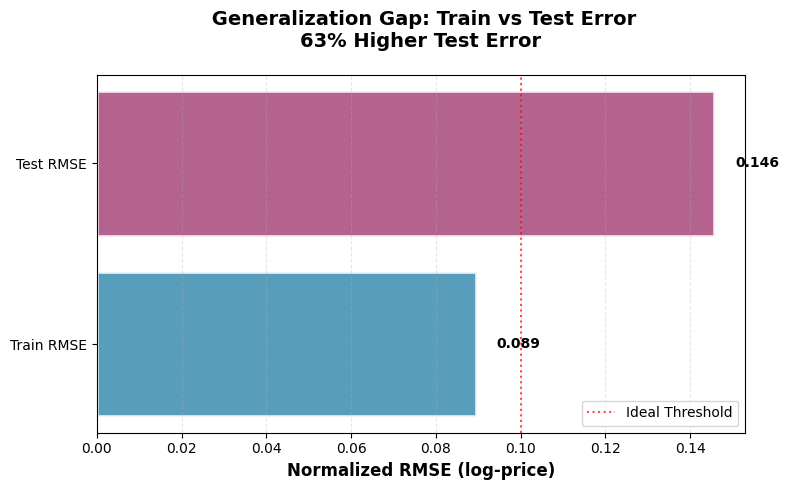

In [44]:
# plot
plt.style.use('default')
sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(['Train RMSE', 'Test RMSE'], [rmse_train, rmse_test],
               color=['#2E86AB', '#A23B72'], alpha=0.8, edgecolor='white', linewidth=2)

#  add value labels on bars
for bar, err in zip(bars, [rmse_train, rmse_test]):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{err:.3f}', va='center', fontweight='bold')

# styling
ax.set_xlabel('Normalized RMSE (log-price)', fontweight='bold', fontsize=12)
ax.set_title(' Generalization Gap: Train vs Test Error\n63% Higher Test Error', 
             fontweight='bold', fontsize=14, pad=20)

# grid + baseline
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.axvline(x=0.1, color='red', linestyle=':', alpha=0.7, label='Ideal Threshold')

ax.legend()
plt.tight_layout()
plt.show()

## Conclusion

The comparison of training and test RMSE illustrates the generalization
behavior of the model. A moderate gap indicates effective learning without
severe overfitting.